<a href="https://colab.research.google.com/github/Syntax-code/Machine-Learning/blob/master/IND_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To analyze state wise corona impact

To analyze growth of victims in corona if Lockdown was not implemented

In [1]:
!pip install kaggle --upgrade
!kaggle --version
from google.colab import files
files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kartikchourasiya","key":"807c8d14f49cd514a2015f84a2a567f1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#chamge permission
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/27.2k [00:00<?, ?B/s]
100% 27.2k/27.2k [00:00<00:00, 42.3MB/s]


In [4]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: IndividualDetails.csv   
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
import plotly.graph_objects as go


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('covid_19_india.csv')

In [7]:
data.shape

(558, 9)

In [0]:
data['nDate'] = data['Date'].str.split('/')



In [0]:
#get the day from dates
data.loc[:, 'Day'] = data.nDate.map(lambda x: x[0])

In [0]:
#get the month from dates
data.loc[:, 'month'] = data.nDate.map(lambda x: x[1])

In [0]:
data['Date'] = data['Date'].astype('|S')



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       558 non-null    int64 
 1   Date                      558 non-null    object
 2   Time                      558 non-null    object
 3   State/UnionTerritory      558 non-null    object
 4   ConfirmedIndianNational   556 non-null    object
 5   ConfirmedForeignNational  556 non-null    object
 6   Cured                     558 non-null    int64 
 7   Deaths                    558 non-null    int64 
 8   Confirmed                 558 non-null    int64 
 9   nDate                     558 non-null    object
 10  Day                       558 non-null    object
dtypes: int64(4), object(7)
memory usage: 48.1+ KB


In [0]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
'''for v in data['Date']:
  data.loc[:, 'nnDate'] = pd.to_datetime.map(str(v))'''

data.loc[:, 'nnDate'] = data.Date.map(lambda x: pd.to_datetime(x))

In [0]:
 # Sort the list in ascending order of dates  
data.sort_values(by=['nnDate'], inplace=True, ascending=True)

In [86]:
data.head(100)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,nnDate
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2020-01-02
31,32,01/03/20,6:00 PM,Kerala,3,0,0,0,3,2020-01-03
529,530,01/04/20,7:30 PM,Andhra Pradesh,-,-,0,0,83,2020-01-04
530,531,01/04/20,7:30 PM,Andaman and Nicobar Islands,-,-,1,0,10,2020-01-04
531,532,01/04/20,7:30 PM,Assam,-,-,0,0,1,2020-01-04
...,...,...,...,...,...,...,...,...,...,...
153,154,15/03/20,6:00 PM,Maharashtra,32,0,0,0,32,2020-03-15
152,153,15/03/20,6:00 PM,Kerala,22,0,3,0,22,2020-03-15
151,152,15/03/20,6:00 PM,Karnataka,6,0,0,1,6,2020-03-15
155,156,15/03/20,6:00 PM,Rajasthan,2,2,3,0,4,2020-03-15


In [0]:
data = data.drop(['Sno', 'Time'], axis = 'columns')

In [85]:
data.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,nnDate
111,112,12/03/20,6:00 PM,Kerala,17,0,3,0,17,2020-12-03
112,113,12/03/20,6:00 PM,Rajasthan,1,2,0,0,3,2020-12-03
113,114,12/03/20,6:00 PM,Telengana,1,0,0,0,1,2020-12-03
114,115,12/03/20,6:00 PM,Uttar Pradesh,10,1,0,0,11,2020-12-03
115,116,12/03/20,6:00 PM,Ladakh,3,0,0,0,3,2020-12-03
116,117,12/03/20,6:00 PM,Tamil Nadu,1,0,0,0,1,2020-12-03
117,118,12/03/20,6:00 PM,Jammu and Kashmir,1,0,0,0,1,2020-12-03
118,119,12/03/20,6:00 PM,Punjab,1,0,0,0,1,2020-12-03
121,122,12/03/20,6:00 PM,Andhra Pradesh,1,0,0,0,1,2020-12-03
120,121,12/03/20,6:00 PM,Maharashtra,11,0,0,0,11,2020-12-03


In [0]:
places = data['State/UnionTerritory'].unique()

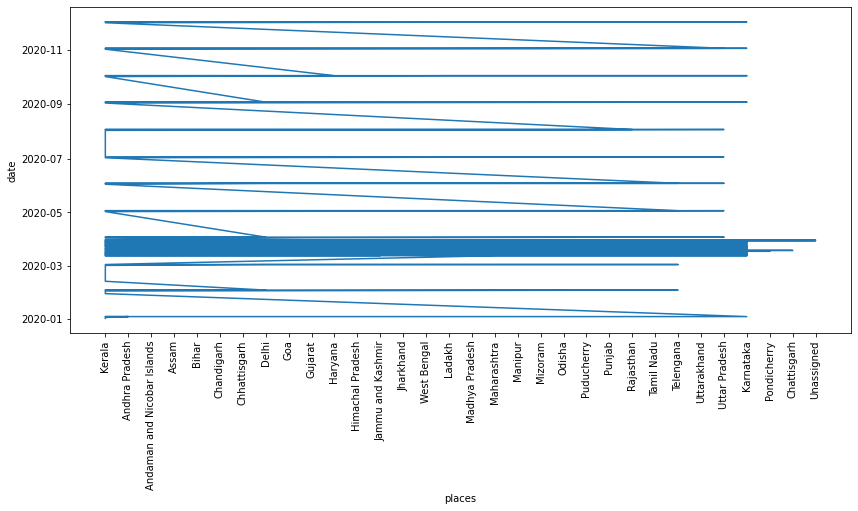

In [99]:
plt.figure(figsize=(14, 6))
plt.plot(data['State/UnionTerritory'], data['nnDate'])
plt.xticks(rotation='vertical')
plt.xlabel('places',)
plt.ylabel('date')
plt.show()

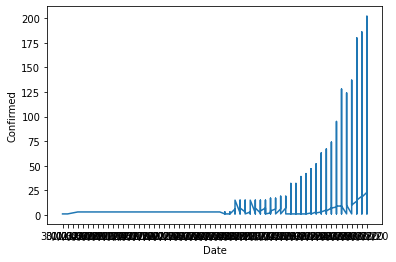

In [0]:
plt.plot(data["Date"], data['Confirmed'], scalex = True)
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.show()

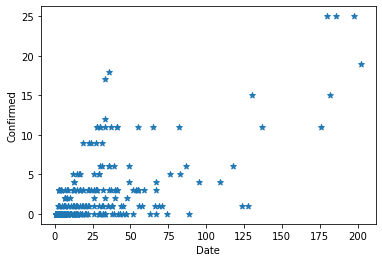

In [0]:
plt.scatter(data["Confirmed"], data['Cured'], marker= '*')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.show()

In [0]:
data['Total Cases'] = data['ConfirmedIndianNational'] + data['ConfirmedForeignNational']
data.head(100)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases
0,30/01/20,Kerala,1,0,0,0,1,10
1,31/01/20,Kerala,1,0,0,0,1,10
2,01/02/20,Kerala,2,0,0,0,2,20
3,02/02/20,Kerala,3,0,0,0,3,30
4,03/02/20,Kerala,3,0,0,0,3,30
...,...,...,...,...,...,...,...,...
95,10/03/20,Telengana,1,0,0,0,1,10
96,10/03/20,Jammu and Kashmir,1,0,0,0,1,10
97,11/03/20,Maharashtra,2,0,0,0,2,20
98,11/03/20,Delhi,5,0,0,0,5,50


In [0]:
df1= data[data['Date']=='28/03/20']
fig = px.bar(df1, x='State/UnionTerritory', y='Total Cases', color='Total Cases', height=600)
fig.update_layout(
    title='Till 27th March Total Cases in India')
fig.show()

In [0]:
df_ICMR = pd.read_csv('ICMRTestingDetails.csv')

In [0]:
#Testing till 25 March
df_ICMR ['DateTime'] =pd.to_datetime(df_ICMR .DateTime,dayfirst=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))
fig.add_trace(go.Scatter(x=df_ICMR['DateTime'], y=df_ICMR['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))
fig.update_layout(title_text='ICMR TEST for COVID-19',plot_bgcolor='rgb(225,230,255)')
fig.show()